In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.layers import Input, Conv1D, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import pickle
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.gridspec as gridspec

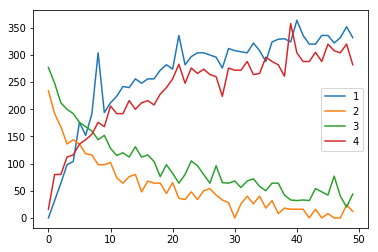

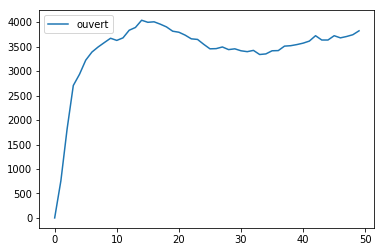

In [18]:
bras1 = np.loadtxt('bras1.txt')
bras2 = np.loadtxt('bras2.txt')
bras3 = np.loadtxt('bras3.txt')
bras4 = np.loadtxt('bras4.txt')
ouvert = np.loadtxt('ouvert.txt')
flag1 = np.where(bras1==10000)
flag2 = np.where(bras2==10000)
flag3 = np.where(bras3==10000)
flag4 = np.where(bras4==10000)
flago = np.where(ouvert==10000)
index = 5
plt.plot(bras1[flag1[0][index]+1:flag1[0][index+1]], label='1')
plt.plot(bras2[flag2[0][index]+1:flag2[0][index+1]], label='2')
plt.plot(bras3[flag3[0][index]+1:flag3[0][index+1]], label='3')
plt.plot(bras4[flag4[0][index]+1:flag4[0][index+1]], label='4')
plt.legend() ; plt.show()
plt.plot(ouvert[flago[0][index]+1:flago[0][index+1]], label='ouvert')
plt.legend() ; plt.show()

267
62


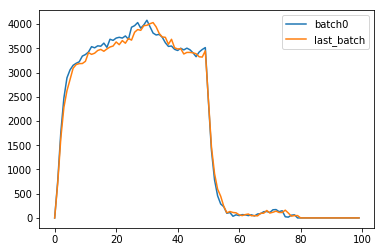

(194, 100)


In [49]:
data_batched = []
for i,f in enumerate(flago[0][:-1]):
    batch = np.array(ouvert[f+1:flago[0][i+1]])
    if batch.shape[0]!=50:
        print(i)
        print(batch.shape[0])
        data_batched.append(batch)
data_batched = np.array(data_batched)
plt.plot(data_batched[0], label='batch0')
plt.plot(data_batched[-1], label='last_batch')
plt.legend()
plt.show()
print(data_batched.shape)

In [ ]:
# Attention ! Ligne suivante à modifier au cas par cas : 
# si la 1er batch est une décharge : on l'enlève (1er indice : 1)
# sinon : 1er indice : pas besoin de préciser
# si le dernier batch est une charge : on l'enlève (dernier indice : -1)
# sinon : dernier indice : pas besoin de préciser

data_batched = np.reshape(data_batched[1:-1,:], (-1,100)) 

(194, 100, 1)


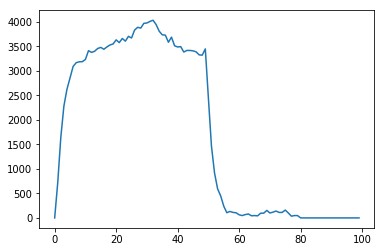

In [50]:
pickle.dump(data_batched, open('ouvert.pkl', 'wb'))
data = np.reshape(pickle.load(open('ouvert.pkl', 'rb')), (-1, 100, 1))
print(data.shape)
plt.plot(data[193])
plt.show()
pickle.dump(data[:170], open('conduction_galvanique/data/ouvert/train.pkl', 'wb')) 
pickle.dump(data[170:], open('conduction_galvanique/data/ouvert/test.pkl', 'wb'))
# la valeur 170 est pour séparer les données test des données d'entrainement

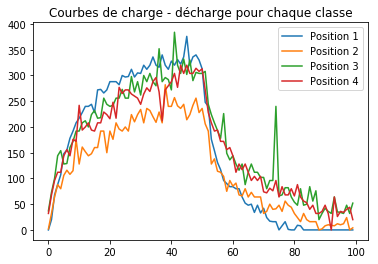

In [53]:
index = 0
bras1 = pickle.load(open('bras1.pkl', 'rb'))
bras2 = pickle.load(open('bras2.pkl', 'rb'))
bras3 = pickle.load(open('bras3.pkl', 'rb'))
bras4 = pickle.load(open('bras4.pkl', 'rb'))
plt.plot(bras1[index,:], label='Position 1')
plt.plot(bras2[index,:], label='Position 2')
plt.plot(bras3[index,:], label='Position 3')
plt.plot(bras4[index,:], label='Position 4')
plt.title('Courbes de charge - décharge pour chaque classe')
plt.legend()
plt.savefig('classes_loin.png', bbox_inches='tight')
plt.show()

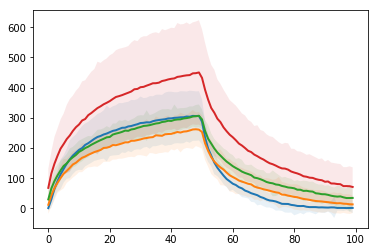

In [90]:
mean1 = np.mean(bras1, axis=0)
mean2 = np.mean(bras2, axis=0)
mean3 = np.mean(bras3, axis=0)
mean4 = np.mean(bras4, axis=0)
std1 =np.std(bras1, axis=0)
std2 =np.std(bras2, axis=0)
std3 =np.std(bras3, axis=0)
std4 =np.std(bras4, axis=0)

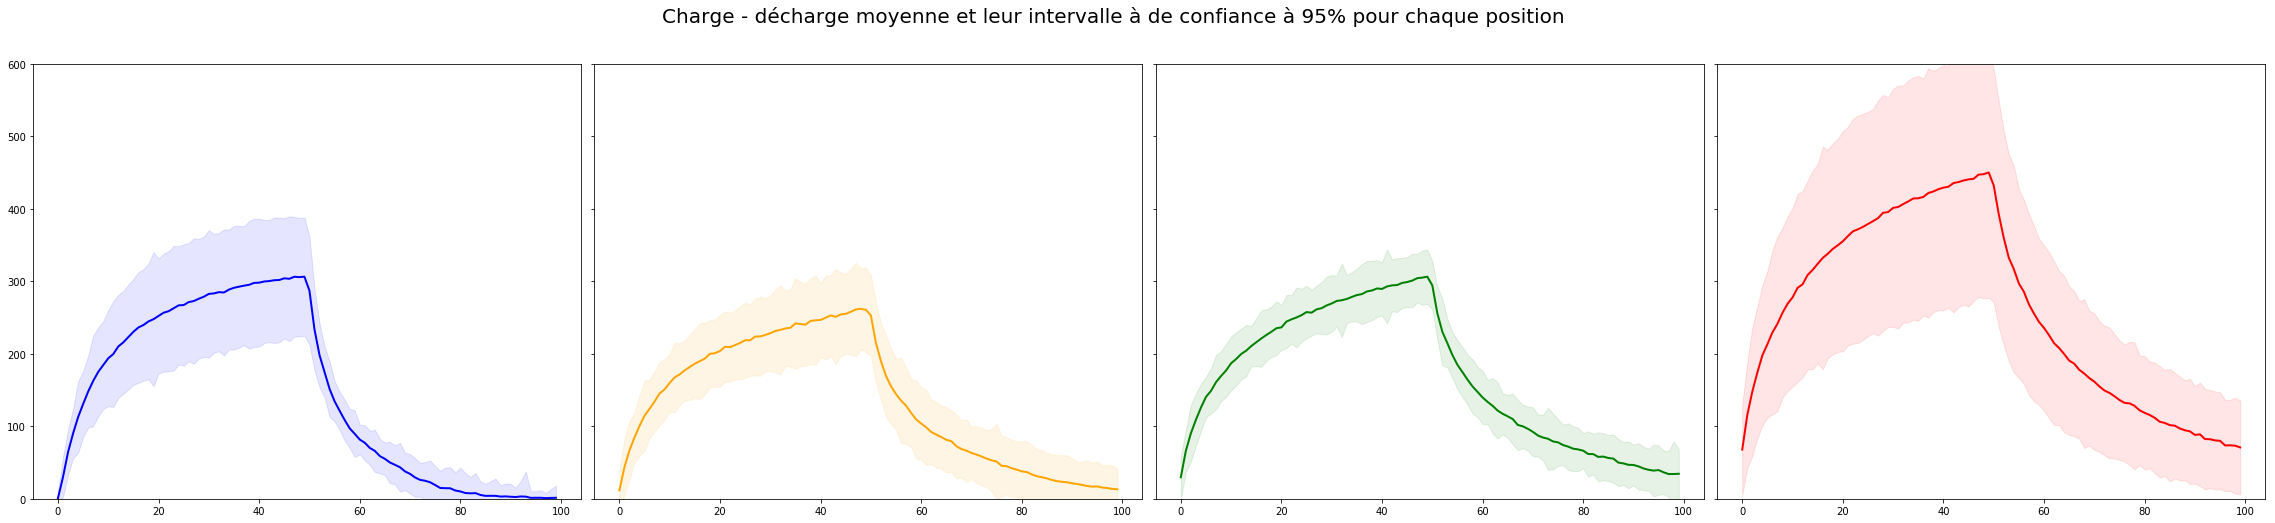

In [114]:
plt.figure(figsize = (40,8))
plt.suptitle("Charge - décharge moyenne et leur intervalle à de confiance à 95% pour chaque position", fontsize=20)
gs = gridspec.GridSpec(1, 4, wspace=0.025, hspace=0.05)
ax1 = plt.subplot(gs[0, 0])
ax1.plot(mean1, linewidth=2, color='b')
ax1.fill_between(range(100),(mean1-2*std1), (mean1+2*std1), color='b', alpha=.1)
ax1.set_ylim([0,600])
ax2 = plt.subplot(gs[0, 1])
ax2.plot(mean2, linewidth=2, color='orange')
ax2.fill_between(range(100),(mean2-2*std2), (mean2+2*std2), color='orange', alpha=.1)
ax2.set_ylim([0,600])
ax2.set_yticklabels([])
ax3 = plt.subplot(gs[0, 2])
ax3.plot(mean3, linewidth=2, color='g')
ax3.fill_between(range(100),(mean3-2*std3), (mean3+2*std3), color='g', alpha=.1)
ax3.set_ylim([0,600])
ax3.set_yticklabels([])
ax4 = plt.subplot(gs[0, 3])
ax4.plot(mean4, linewidth=2, color='r')
ax4.fill_between(range(100),(mean4-2*std4), (mean4+2*std4), color='r', alpha=.1)
ax4.set_ylim([0,600])
ax4.set_yticklabels([])
plt.savefig('classes_std.png', bbox_inches = 'tight')
plt.show()